In [1]:
#from pathlib import Path

import glob
import altair as alt
import pandas as pd
import numpy as np

In [7]:
colo829bl_10x = pd.read_csv("../data/processed/manual_telomere_coords/COLO829BL-10X-hg38.hist.csv", dtype={"mmap_count": np.int})
colo829t_10x = pd.read_csv("../data/processed/manual_telomere_coords/COLO829T-10X-hg38.hist.csv", dtype={"mmap_count": np.int})
colo829bl = pd.read_csv("../data/processed/manual_telomere_coords/COLO829BL-hg38.hist.csv", dtype={"mmap_count": np.int})
colo829t = pd.read_csv("../data/processed/manual_telomere_coords/COLO829T-hg38.hist.csv", dtype={"mmap_count": np.int})

colo829bl_10x['color'] = 1
colo829t_10x['color'] = 2
colo829bl['color'] = 3
colo829t['color'] = 4

In [10]:
datasets = [colo829bl_10x, colo829t_10x, colo829bl, colo829t]
datasets_excluded_chroms = []

for ds in datasets:
    ds = ds[ds['chromosome'] != 'chr5']
    ds = ds[ds['chromosome'] != 'chr1']
    ds = ds[ds['chromosome'] != 'chrX']
    
    datasets_excluded_chroms.append(ds)

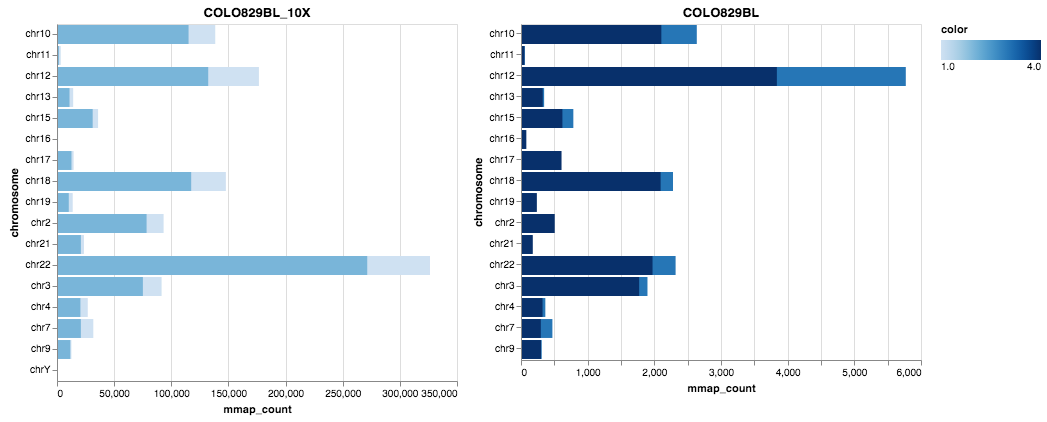

In [11]:
charts = []

for ds in datasets_excluded_chroms:
    charts.append(alt.Chart(ds).mark_bar().encode(
        x = 'mmap_count',
        y = 'chromosome',
        color = 'color'
    ))

charts[0].title = "COLO829BL_10X"
charts[1].title = "COLO829T_10X"
charts[2].title = "COLO829BL"
charts[3].title = "COLO829T"

# Titles will not concatenate when Layering plots like I do here with 10x vs Truseq.
# This is, I think, because bugs in vega-lite merged in March not yet upstreamed: https://github.com/altair-viz/altair/issues/585 and https://github.com/vega/vega-lite/pull/3620
(charts[0] + charts[1]) | (charts[2] + charts[3])